In [3]:
pip install ultralytics

Python(28365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="RzM4CZkZOQaWdtYBDalv")
project = rf.workspace("dsp-object-detection").project("car-plate-detector-x87mo")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-Plate-Detector-2 in yolov8:: 100%|██████████| 64/64 [00:00<00:00, 3409.35it/s]


In [2]:
!yolo task=detect mode=train model=yolov8l.pt data="/Users/abigailabienbitay/Library/CloudStorage/OneDrive-Personal/UB LIPA/4th year/dsp/dsp abby/Untitled/dspCPE4A2526/dspPython/Activity9/Car-Plate-Detector-2/data.yaml" epochs=20 imgsz=640 batch=16 plots=True


WARNING ⚠️ Download failure, retrying 1/3 https://github.com/ultralytics/assets/releases/download/v8.3.0/yolov8l.pt...
######################################################################### 100.0% 34.5%                       42.4%#############                                       50.6%                      66.2%                 71.7%
New https://pypi.org/project/ultralytics/8.3.203 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.201 🚀 Python-3.13.1 torch-2.8.0 CPU (Apple M2)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/abigailabienbitay/Library/CloudStorage/OneDrive-Personal/UB LIPA/4th year/dsp/dsp abby/Untitled/dspCPE4A2526/dspPython/Activity9/Car-Plate-Detector-2/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, 

In [12]:
import cv2
from ultralytics import YOLO
#import numpy as np
import matplotlib.pyplot as plt

In [15]:
pip install pytesseract


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



image 1/1 /Users/abigailabienbitay/Library/CloudStorage/OneDrive-Personal/UB LIPA/4th year/dsp/dsp abby/Untitled/dspCPE4A2526/dspPython/Activity9/test.jpeg: 640x384 1 plate, 275.0ms
Speed: 2.3ms preprocess, 275.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
Plate 0 - Extracted Text: DBQ 1562


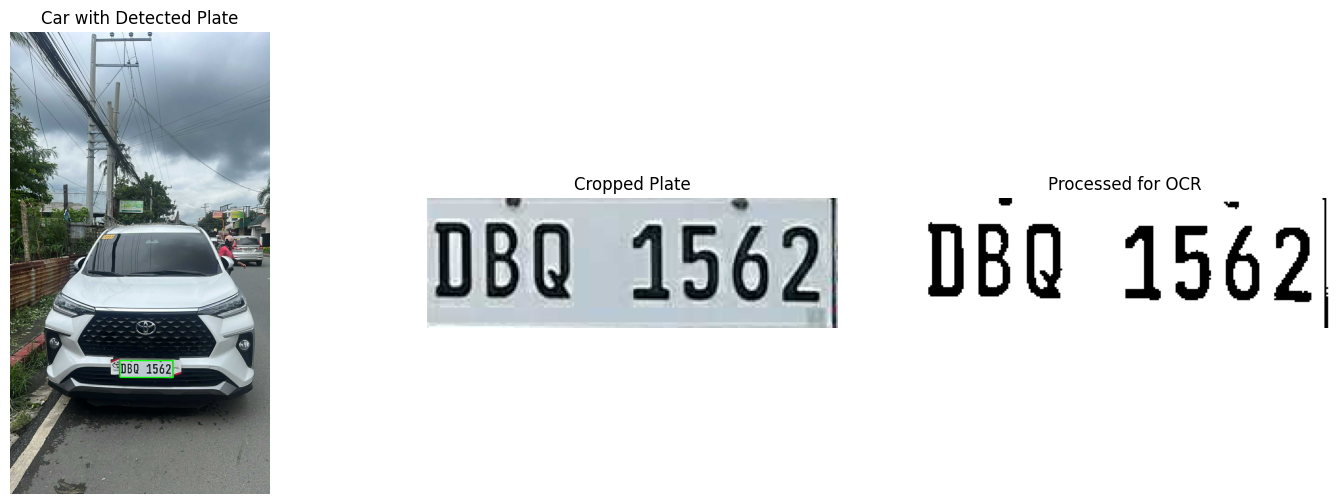

In [42]:
import cv2
from ultralytics import YOLO
import pytesseract
from matplotlib import pyplot as plt

def ocr_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 80, 250, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    text = pytesseract.image_to_string(cleaned, config="--psm 7")
    return text.strip(), cleaned

model = YOLO("runs/detect/train/weights/best.pt")
image_path = "test.jpeg"

results = model(image_path, conf=0.95)
boxes = results[0].boxes
names = model.names

img = cv2.imread(image_path)
img_with_box = img.copy()

for i, box in enumerate(boxes):
    cls = int(box.cls[0])
    if names[cls] in ["plate", "license_plate", "car_plate"]:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        cv2.rectangle(img_with_box, (x1, y1), (x2, y2), (0, 255, 0), 3)
        plate_crop = img[y1:y2, x1:x2]
        crop_path = f"plate_{i}.jpg"
        cv2.imwrite(crop_path, plate_crop)
        text_output, processed = ocr_image(plate_crop)
        print(f"Plate {i} - Extracted Text: {text_output}")
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))
        axs[0].imshow(cv2.cvtColor(img_with_box, cv2.COLOR_BGR2RGB))
        axs[0].set_title("Car with Detected Plate")
        axs[0].axis("off")
        axs[1].imshow(cv2.cvtColor(plate_crop, cv2.COLOR_BGR2RGB))
        axs[1].set_title("Cropped Plate")
        axs[1].axis("off")
        axs[2].imshow(processed, cmap="gray")
        axs[2].set_title("Processed for OCR")
        axs[2].axis("off")
        plt.show()
